In [52]:
#import lib

In [1]:
import nltk
import string
from heapq import nlargest

In [2]:
#PREPARE THE TEXT DATA AND READ IT


In [3]:
with open("OCR project/output.txt",encoding="utf8") as f:
    text=f.read( )

In [4]:
print(text)

ee. 666 A Study in Scarlet — Editedy

CHAPTER II.
THE SCIENCE OF DEDUCTION.

We met next day as he had arranged, and inspected the rooms at No. 221B, Baker Street,
of which he had spoken at our meeting. They consisted of a couple of comfortable bed-
rooms and a single large airy sitting-room, cheerfully furnished, and illuminated by
two broad windows. So desirable in every way were the apartments, and so moderate did
the terms seem when divided between us, that the bargain was concluded upon the spot,
and we at once entered into possession. That very evening I moved my things round from
the hotel, and on the following morning Sherlock Holmes followed me with several boxes
and portmanteaus. For a day or two we were busily employed in unpacking and laying out
our property to the best advantage. That done, we gradually began to settle down and to
accommodate ourselves to our new surroundings.

Holmes was certainly not a difficult man to live with. He was quiet in his ways, and
his habits 

In [5]:
#genetare the word cloud

There are 1814 words in all text.


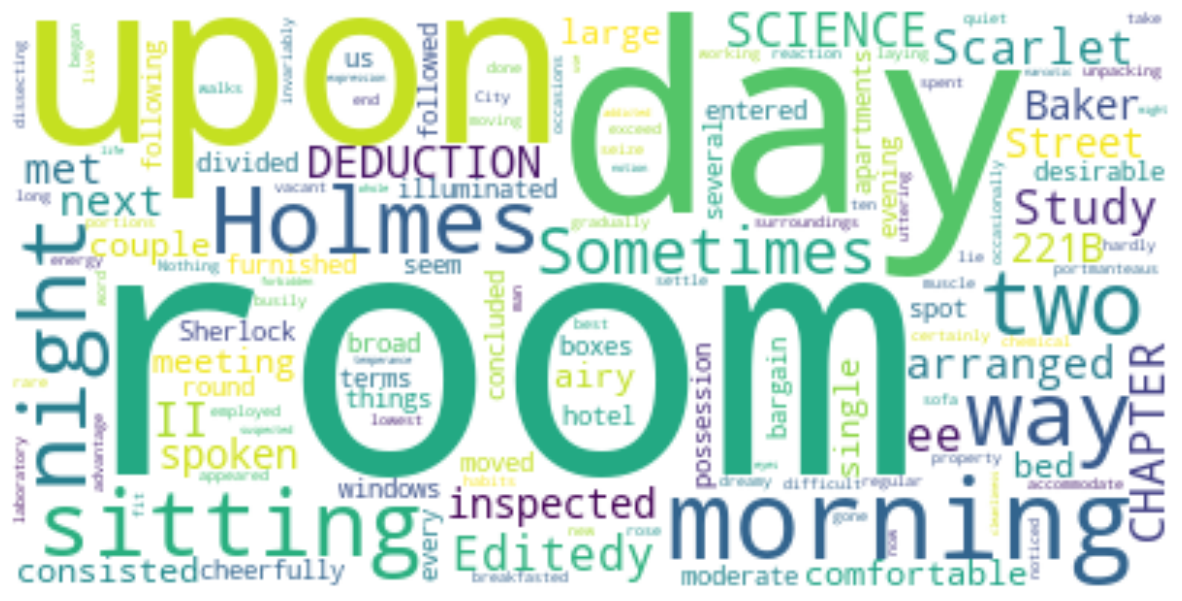

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Assuming 'text' is already defined

print("There are {} words in all text.".format(len(text)))

wc = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [7]:
#keyword extraction


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [9]:
from rake_nltk import Rake
rk=Rake()
rk.extract_keywords_from_text(text)
extract_keyword=rk.get_ranked_phrases()
extract_keyword



['scarlet — editedy chapter ii',
 'following morning sherlock holmes followed',
 'single large airy sitting',
 'sitting — room',
 'whole life forbidden',
 'reaction would seize',
 'nothing could exceed',
 'would lie upon',
 'two broad windows',
 'met next day',
 'working fit',
 'vacant expression',
 'things round',
 'terms seem',
 'several boxes',
 'new surroundings',
 'lowest portions',
 'long walks',
 'invariably breakfasted',
 'hardly uttering',
 'gradually began',
 'every way',
 'difficult man',
 'concluded upon',
 'comfortable bed',
 'chemical laboratory',
 'cheerfully furnished',
 'busily employed',
 'best advantage',
 'baker street',
 'holmes',
 'morning',
 'morning',
 'upon',
 'two',
 'room',
 'day',
 'day',
 'word',
 'ways',
 'use',
 'us',
 'unpacking',
 'ten',
 'temperance',
 'take',
 'suspected',
 'study',
 'spot',
 'spoken',
 'spent',
 'sometimes',
 'sometimes',
 'sofa',
 'settle',
 'science',
 'rose',
 'rooms',
 'rooms',
 'rooms',
 'regular',
 'rare',
 'quiet',
 'property'

In [10]:
#summarization

In [11]:
print (text.count("."))
print(string.punctuation)
nopuch=[char for char in text if char not in string.punctuation]
nopuch="".join(nopuch)
#print(nopuch)

process_text=[word for word in nopuch.split() if word.lower() not in nltk.corpus.stopwords.words('english') ]
#print(process_text)
word_freq={}
for word in process_text:
    if word not in word_freq:
        word_freq[word]=1
    else:
        word_freq[word]=word_freq[word]+1
        
#print(word_freq)
sorted_dict = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
#print(sorted_dict)

max_freq=max(word_freq.values())
print(max_freq)

for word in word_freq.keys():
    word_freq[word]=word_freq[word] / max_freq
print(word_freq)

#sentence freq
sent_list=nltk.sent_tokenize(text)

sent_score={}
for sent in sent_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_freq.keys():
          if sent not in sent_score.keys():
            sent_score[sent]=word_freq[word]
          else:
            sent_score[sent]=sent_score[sent]+word_freq[word]
dict(sorted(sent_score.items(),key=lambda item:item[1],reverse=True))

summary_sent=nlargest(3,sent_score, key=sent_score.get)
summary=" ".join(summary_sent)

print(summary)

16
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
3
{'ee': 0.3333333333333333, '666': 0.3333333333333333, 'Study': 0.3333333333333333, 'Scarlet': 0.3333333333333333, '—': 0.3333333333333333, 'Editedy': 0.3333333333333333, 'CHAPTER': 0.3333333333333333, 'II': 0.3333333333333333, 'SCIENCE': 0.3333333333333333, 'DEDUCTION': 0.3333333333333333, 'met': 0.3333333333333333, 'next': 0.3333333333333333, 'day': 1.0, 'arranged': 0.3333333333333333, 'inspected': 0.3333333333333333, 'rooms': 0.6666666666666666, '221B': 0.3333333333333333, 'Baker': 0.3333333333333333, 'Street': 0.3333333333333333, 'spoken': 0.3333333333333333, 'meeting': 0.3333333333333333, 'consisted': 0.3333333333333333, 'couple': 0.3333333333333333, 'comfortable': 0.3333333333333333, 'bed': 0.3333333333333333, 'single': 0.3333333333333333, 'large': 0.3333333333333333, 'airy': 0.3333333333333333, 'sittingroom': 0.3333333333333333, 'cheerfully': 0.3333333333333333, 'furnished': 0.3333333333333333, 'illuminated': 0.3333333333333333, 'two': 0.6666

In [12]:
print(summary)

Nothing
could exceed his energy when the working fit was upon him; but now and again a reaction
would seize him, and for days on end he would lie upon the sofa in the sitting—room,
hardly uttering a word or moving a muscle from morning to night. So desirable in every way were the apartments, and so moderate did
the terms seem when divided between us, that the bargain was concluded upon the spot,
and we at once entered into possession. On these occasions I
have noticed such a dreamy, vacant expression in his eyes, that I might have suspected
him of being addicted to the use of some narcotic, had not the temperance and
cleanliness of his whole life forbidden such a notion.
